In [1]:
# Question 1
# The question was unclear, it asks to modify VisualizingResNet50Activations.ipynb,
# But I could only find VisualizingVGGActivations.ipynb and VisualizingResNet50Filter.ipynb
# So I'm modifying VisualizingResNet50Filter.ipynb

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from numpy import expand_dims

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

# load the model
model = ResNet50(weights='imagenet')
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [2]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if '_conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

In [3]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[7].get_weights()

In [4]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

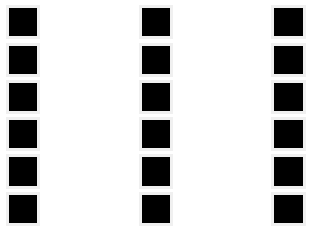

In [5]:
# plot first six filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [6]:
print(filters[:,:,0,0])

[[0.724878]]


In [7]:
# Question 2

import numpy as np

filename = 'Xray.csv'
data = np.genfromtxt(filename, delimiter=',')
X = data[:,:-1]
y = data[:,-1]

print(f'X.shape = {X.shape}')
print(f'X.shape = {X.shape}')

X.shape = (800, 6)
X.shape = (800, 6)


In [8]:
# Partition the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7, 
    shuffle=True,
    stratify=y
)

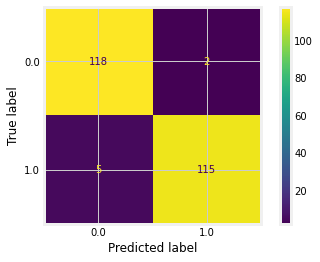

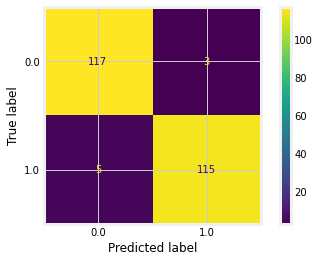

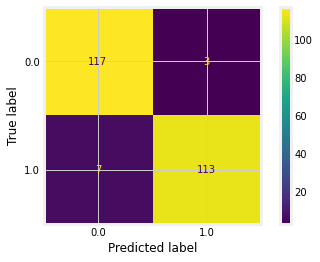

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC

kf = KFold(n_splits=3)

models = (
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf'),
)

for model in models:
    for train, _ in kf.split(X_train):
        model.fit(X_train[train], y_train[train])
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [10]:
# Question 3

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.85, 
    shuffle=True,
    stratify=y
)

In [11]:
kf = KFold(n_splits=5)

rfc = RandomForestClassifier()

print(cross_val_score(rfc, X_train, y_train, cv = kf))

for train, _ in kf.split(X_train):
    rfc.fit(X_train[train], y_train[train])

rfc.score(X_test, y_test)

[0.96323529 0.97794118 0.97794118 0.96323529 0.96323529]


0.9583333333333334